![data-x](http://oi64.tinypic.com/o858n4.jpg)

___

## Electric Price Prediction (EPP) Project

To Extract Data From EIA:  

In [103]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

# Garbage Collector
import gc

In [104]:
# Reading data file - 4 years

data = pd.read_csv('combined_avg_price.csv', parse_dates=[0], index_col=0, dayfirst=True)  # all data
data.head()

,NP15,SP15,PVP,PG&E,SCCG,SCEB
2014-01-01,0.00,0.00,0.00,0.00,0.00,0.00
2014-01-02,0.00,0.00,47.95,0.00,0.00,0.00
2014-01-03,54.81,0.00,43.44,0.00,0.00,0.00
2014-01-04,49.25,0.00,41.68,5.01,4.76,4.58
2014-01-05,62.06,60.84,43.05,5.27,5.08,4.93


In [105]:
# Slicing data per year
data14 = data[(data.index >= ('2014-1-1')) & (data.index <= ('2014-12-31'))].copy()
data15 = data[(data.index >= ('2015-1-1')) & (data.index <= ('2015-12-31'))].copy()
data16 = data[(data.index >= ('2016-1-1')) & (data.index <= ('2016-12-31'))].copy()
data17 = data[(data.index >= ('2017-1-1')) & (data.index <= ('2017-12-31'))].copy()  # 2017-10-24
data14.tail()  # last 4 days

,NP15,SP15,PVP,PG&E,SCCG,SCEB
2014-12-27,0.00,0.00,0.00,0.00,0.00,0.00
2014-12-28,0.00,0.00,0.00,0.00,0.00,0.00
2014-12-29,0.00,35.50,25.75,3.36,2.81,2.84
2014-12-30,38.25,39.45,35.08,3.51,3.63,3.61
2014-12-31,0.00,39.24,32.64,3.53,3.46,3.41


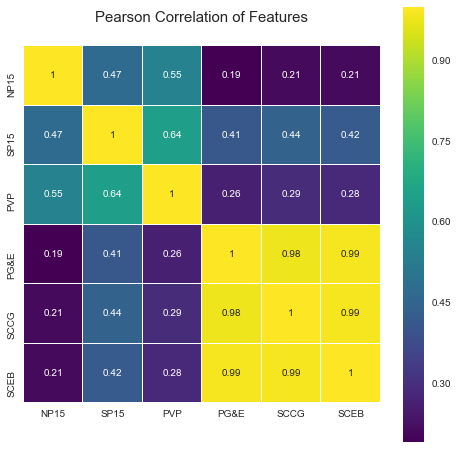

In [106]:
# Check correlation between features 
# (uncorrelated features are generally more powerful predictors)
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

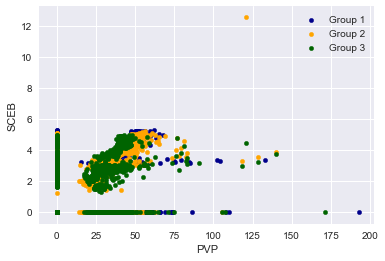

In [107]:
#data.plot(kind='scatter', x='NP15', y='PG&E')
plt.figure(figsize=(10,10))
ax = data.plot(kind='scatter', x='NP15', y='PG&E', color='DarkBlue',  label='Group 1');
data.plot(kind='scatter', x='SP15', y='SCCG', color='Orange',         label='Group 2', ax=ax);  
data.plot(kind='scatter', x='PVP',  y='SCEB', color='DarkGreen',      label='Group 3', ax=ax); 

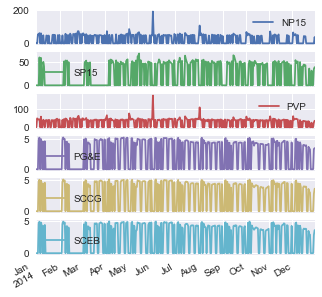

In [108]:
data14.plot(subplots=True, figsize=(5, 5)); # 2014

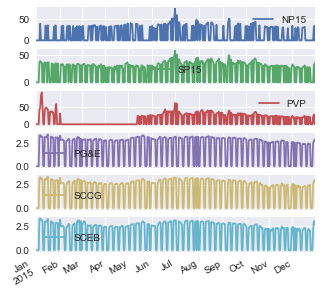

In [109]:
data15.plot(subplots=True, figsize=(5, 5)); # 2015

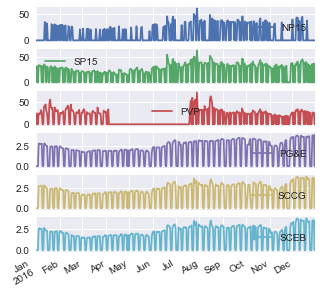

In [110]:
data16.plot(subplots=True, figsize=(5, 5)); # 2016

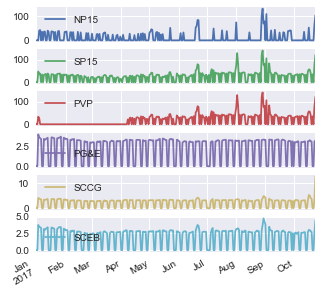

In [111]:
data17.plot(subplots=True, figsize=(5, 5)); # 2017

In [112]:
#plt.figure(figsize=(5,5)); 
#data14.NP15.plot(style='.', label='Series');

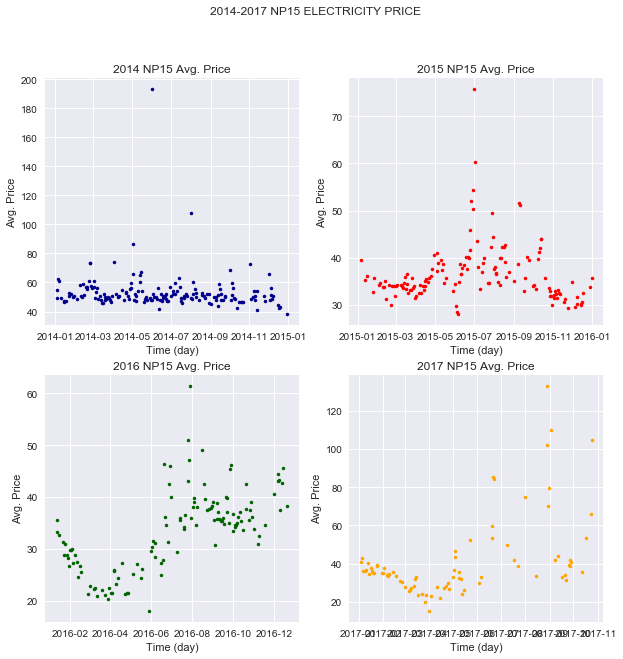

In [113]:
# Plot NP15 - Electric

x1 = data14.NP15[data14.NP15 > 0].copy()
x2 = data15.NP15[data15.NP15 > 0].copy()
x3 = data16.NP15[data16.NP15 > 0].copy()
x4 = data17.NP15[data17.NP15 > 0].copy()

t1 = data14.index[data14.NP15 > 0].copy()
t2 = data15.index[data15.NP15 > 0].copy()
t3 = data16.index[data16.NP15 > 0].copy()
t4 = data17.index[data17.NP15 > 0].copy()

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(t1, x1, c='darkblue', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2014 NP15 Avg. Price')

plt.subplot(222)
plt.plot(t2, x2, c='red', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2015 NP15 Avg. Price')

plt.subplot(223)
plt.plot(t3, x3, c='darkgreen', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2016 NP15 Avg. Price')

plt.subplot(224)
plt.plot(t4, x4, c='orange', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2017 NP15 Avg. Price')

plt.suptitle('2014-2017 NP15 ELECTRICITY PRICE')
plt.show()

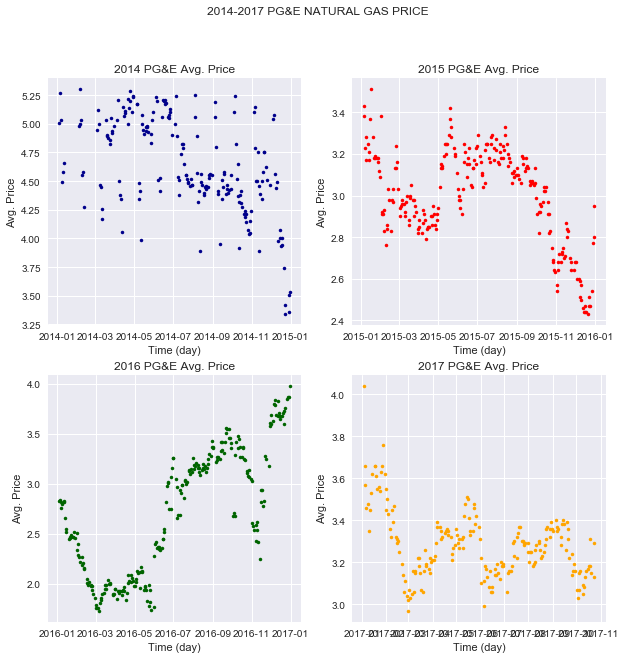

In [114]:
# Plot PG&E - Natural Gas

x1 = data14['PG&E'][data14['PG&E'] > 0].copy()
x2 = data15['PG&E'][data15['PG&E'] > 0].copy()
x3 = data16['PG&E'][data16['PG&E'] > 0].copy()
x4 = data17['PG&E'][data17['PG&E'] > 0].copy()

t1 = data14.index[data14['PG&E'] > 0].copy()
t2 = data15.index[data15['PG&E'] > 0].copy()
t3 = data16.index[data16['PG&E'] > 0].copy()
t4 = data17.index[data17['PG&E'] > 0].copy()

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(t1, x1, c='darkblue', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2014 PG&E Avg. Price')

plt.subplot(222)
plt.plot(t2, x2, c='red', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2015 PG&E Avg. Price')

plt.subplot(223)
plt.plot(t3, x3, c='darkgreen', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2016 PG&E Avg. Price')

plt.subplot(224)
plt.plot(t4, x4, c='orange', linestyle= 'none', marker = '.')
plt.xlabel("Time (day)")
plt.ylabel("Avg. Price")
plt.title('2017 PG&E Avg. Price')

plt.suptitle('2014-2017 PG&E NATURAL GAS PRICE')
plt.show()

1. Coefficients      : [[ 0.01462734]]
   Mean squared error: 2.88397722982


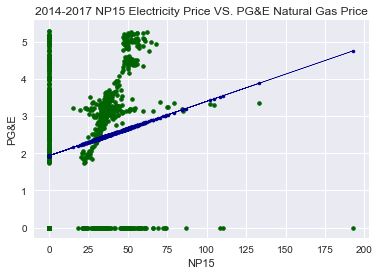

In [115]:
# Linear Regression
from sklearn import linear_model

y_reg = data['PG&E'].copy()
x_reg = data['NP15'].copy()

y_reg = y_reg.values.reshape(-1,1)
x_reg = x_reg.values.reshape(-1,1)

regr = linear_model.LinearRegression()

# Plot outputs
fig, ax = plt.subplots()
plt.title('2014-2017 NP15 Electricity Price VS. PG&E Natural Gas Price')

regr1 = regr.fit(x_reg, y_reg) # Training the model
z_reg=regr.predict(x_reg)

print('1. Coefficients      :', regr1.coef_) # The coefficient
print("   Mean squared error:", np.mean((z_reg - y_reg) ** 2)) # The Mean Squared Errod

#data14.plot(kind='scatter', x='NP15', y='PG&E', ax=ax)
plt.scatter(x_reg, y_reg, color='darkgreen', linewidth = 1, marker = '.') 
plt.plot(x_reg, z_reg, color='darkblue', linewidth = 0.5, marker = '.')
plt.xlabel('NP15'); plt.ylabel('PG&E')

# Turn on the grid
ax.grid()
ax.xaxis.grid() # horizontal lines
ax.yaxis.grid() # vertial lines

In [116]:
x = data14['PG&E'][data14['PG&E'] > 0].copy()  # PG&E Natural Gas Price
y = data14['NP15'][data14['NP15'] > 0].copy()  # NP15 Electricity Price

#print (x.count())
#print (y.count())

172
1. Coefficients      : [[-0.02644703]]
   Mean squared error: 173.212455979


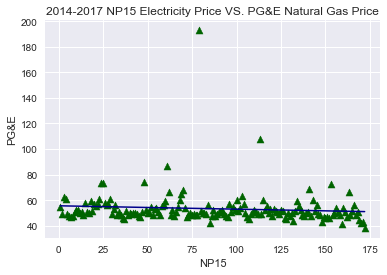

In [117]:
# Linear Regression - NP15 versus time

from sklearn import linear_model

#y_reg = data['PG&E'].copy()
y_reg = y #data14['NP15'].copy()
x_reg = np.arange(1, y_reg.count()+1)  #('2014-01-01','2014-12-31', dtype='datetime64[D]')

print (y_reg.count())
#print (x_reg.count())

y_reg = y_reg.values.reshape(-1,1)
x_reg = x_reg.reshape(-1,1)

regr = linear_model.LinearRegression()

# Plot outputs
fig, ax = plt.subplots()
plt.title('2014-2017 NP15 Electricity Price VS. PG&E Natural Gas Price')

regr1 = regr.fit(x_reg, y_reg) # Training the model
z_reg=regr.predict(x_reg)

print('1. Coefficients      :', regr1.coef_) # The coefficient
print("   Mean squared error:", np.mean((z_reg - y_reg) ** 2)) # The Mean Squared Errod

#data14.plot(kind='scatter', x='NP15', y='PG&E', ax=ax)
plt.scatter(x_reg, y_reg, color='darkgreen', linewidth = 0.5, marker = '^') 
plt.plot(x_reg, z_reg, color='darkblue', linewidth = 1.5, marker = 'x')
plt.xlabel('NP15'); plt.ylabel('PG&E')

# Turn on the grid
ax.grid()
ax.xaxis.grid() # horizontal lines
ax.yaxis.grid() # vertial lines

198
1. Coefficients      : [[-0.00408855]]
   Mean squared error: 0.120159267187


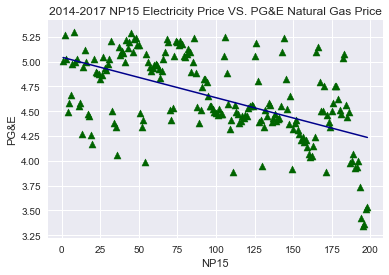

In [118]:
# Linear Regression - PG&E versus time

from sklearn import linear_model

y_reg = x # data['PG&E'].copy()
#y_reg = y #data14['NP15'].copy()
x_reg = np.arange(1, y_reg.count()+1)  #('2014-01-01','2014-12-31', dtype='datetime64[D]')

print (y_reg.count())
#print (x_reg.count())

y_reg = y_reg.values.reshape(-1,1)
x_reg = x_reg.reshape(-1,1)

regr = linear_model.LinearRegression()

# Plot outputs
fig, ax = plt.subplots()
plt.title('2014-2017 NP15 Electricity Price VS. PG&E Natural Gas Price')

regr1 = regr.fit(x_reg, y_reg) # Training the model
z_reg=regr.predict(x_reg)

print('1. Coefficients      :', regr1.coef_) # The coefficient
print("   Mean squared error:", np.mean((z_reg - y_reg) ** 2)) # The Mean Squared Errod

#data14.plot(kind='scatter', x='NP15', y='PG&E', ax=ax)
plt.scatter(x_reg, y_reg, color='darkgreen', linewidth = 0.5, marker = '^') 
plt.plot(x_reg, z_reg, color='darkblue', linewidth = 1.5, marker = 'x')
plt.xlabel('NP15'); plt.ylabel('PG&E')

# Turn on the grid
ax.grid()
ax.xaxis.grid() # horizontal lines
ax.yaxis.grid() # vertial lines

In [129]:
x = data['PG&E'][data['PG&E'] > 0].copy()  # PG&E Natural Gas Price
y = data['NP15'][data['NP15'] > 0].copy()  # NP15 Electricity Price

print (x.count())
print (y.count())

902
524


524
1. Coefficients      : [[-0.03618729]]
   Mean squared error: 188.950428287


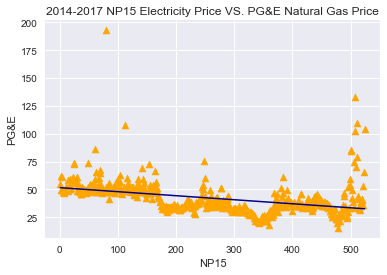

In [130]:
# Linear Regression - NP15 versus time
from sklearn import linear_model

#y_reg = data['PG&E'].copy()
y_reg = y #data14['NP15'].copy()
x_reg = np.arange(1, y_reg.count()+1)  #('2014-01-01','2014-12-31', dtype='datetime64[D]')

print (y_reg.count())
#print (x_reg.count())

y_reg = y_reg.values.reshape(-1,1)
x_reg = x_reg.reshape(-1,1)

regr = linear_model.LinearRegression()

# Plot outputs
fig, ax = plt.subplots()
plt.title('2014-2017 NP15 Electricity Price VS. PG&E Natural Gas Price')

regr1 = regr.fit(x_reg, y_reg) # Training the model
z_reg=regr.predict(x_reg)

print('1. Coefficients      :', regr1.coef_) # The coefficient
print("   Mean squared error:", np.mean((z_reg - y_reg) ** 2)) # The Mean Squared Errod

#data14.plot(kind='scatter', x='NP15', y='PG&E', ax=ax)
plt.scatter(x_reg, y_reg, color='orange', linewidth = 0.5, marker = '^') 
plt.plot(x_reg, z_reg, color='darkblue', linewidth = 1.5, marker = 'x')
plt.xlabel('NP15'); plt.ylabel('PG&E')

# Turn on the grid
ax.grid()
ax.xaxis.grid() # horizontal lines
ax.yaxis.grid() # vertial lines

1. Coefficients      : [[-0.00162332]]
   Mean squared error: 0.500023483404


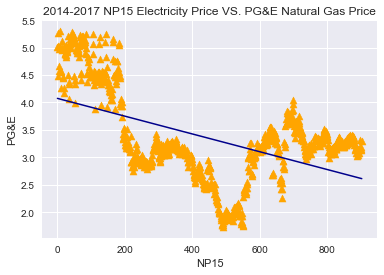

In [131]:
# Linear Regression - PG&E versus time
#from sklearn import linear_model

y_reg = x  #data['PG&E'].copy()
#y_reg = y #data14['NP15'].copy()
x_reg = np.arange(1, y_reg.count()+1)  #('2014-01-01','2014-12-31', dtype='datetime64[D]')

#print (y_reg.count())
#print (x_reg.count())

y_reg = y_reg.values.reshape(-1,1)
x_reg = x_reg.reshape(-1,1)

regr = linear_model.LinearRegression()

# Plot outputs
fig, ax = plt.subplots()
plt.title('2014-2017 NP15 Electricity Price VS. PG&E Natural Gas Price')

regr1 = regr.fit(x_reg, y_reg) # Training the model
z_reg=regr.predict(x_reg)

print('1. Coefficients      :', regr1.coef_) # The coefficient
print("   Mean squared error:", np.mean((z_reg - y_reg) ** 2)) # The Mean Squared Errod

#data14.plot(kind='scatter', x='NP15', y='PG&E', ax=ax)
plt.scatter(x_reg, y_reg, color='orange', linewidth = 0.5, marker = '^') 
plt.plot(x_reg, z_reg, color='darkblue', linewidth = 1.5, marker = 'x')
plt.xlabel('NP15'); plt.ylabel('PG&E')

# Turn on the grid
ax.grid()
ax.xaxis.grid() # horizontal lines
ax.yaxis.grid() # vertial lines

In [191]:
# Garbage collector - releasing memory
gc.collect()

0

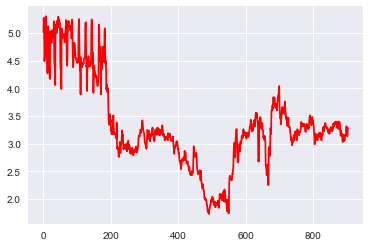

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,5,1.2,1.3,1.5,1.6,1.8,1.9,2.1,2.4,2.6,2.9,3.1,3.5,3.8,4.2
1,2,5.3,1.4,1.7,2.1,2.5,3,3.6,4.3,5.2,6.2,7.4,8.9,11,13,15
2,3,5,1.7,2.2,2.9,3.7,4.8,6.3,8.2,11,14,18,23,30,39,51
3,4,4.5,2,2.7,3.8,5.4,7.5,11,15,21,29,40,57,79,1.1e+02,1.6e+02
4,5,4.6,2.2,3.4,5.1,7.6,11,17,26,38,58,86,1.3e+02,1.9e+02,2.9e+02,4.4e+02
5,6,4.7,2.6,4.1,6.5,10,17,27,43,69,1.1e+02,1.8e+02,2.8e+02,4.5e+02,7.2e+02,1.2e+03
6,7,5,2.9,4.9,8.3,14,24,41,70,1.2e+02,2e+02,3.4e+02,5.8e+02,9.9e+02,1.7e+03,2.9e+03
7,8,5.3,3.2,5.8,10,19,34,61,1.1e+02,2e+02,3.6e+02,6.4e+02,1.2e+03,2.1e+03,3.7e+03,6.7e+03
8,9,5,3.6,6.9,13,25,47,89,1.7e+02,3.2e+02,6.1e+02,1.2e+03,2.2e+03,4.2e+03,8e+03,1.5e+04
9,10,5,4,8,16,32,64,1.3e+02,2.6e+02,5.1e+02,1e+03,2e+03,4.1e+03,8.2e+03,1.6e+04,3.3e+04


In [202]:
# Polynomial Regression
import warnings
warnings.filterwarnings('ignore')

#Define input array with angles from 60deg to 300deg converted to radians
#x = np.array([i*np.pi/180 for i in range(60,300,4)])
#np.random.seed(10)  #Setting seed for reproducability
#y = np.sin(x) + np.random.normal(0,0.15,len(x)) # Adding Noise

y_reg = data['PG&E'][data['PG&E'] > 0].copy()  #x  #data['PG&E'].copy()
#y_reg = y #data14['NP15'].copy()
x_reg = np.arange(1, y_reg.count()+1)  #('2014-01-01','2014-12-31', dtype='datetime64[D]')

#print (y_reg.count())
#print (x_reg.count())

#y_reg = y_reg.reshape(-1,1)
#x_reg = x_reg.reshape(-1,1)

#dataX = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(x_reg, y_reg,color='red', marker='.', ms=1)
plt.show()

for i in range(2,16):        #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    dataX[colname] = (1+(x_reg*.1))**i

dataX.head(10).round(2)

In [203]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    x = 1 + (x_reg*.1)
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(dataX[predictors],y_reg)
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(dataX['x'],y_pred,color='darkred', marker='.', ms=4)
        plt.plot(dataX['x'],y_reg, color='blue',marker='.', ms=4)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y_reg)**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

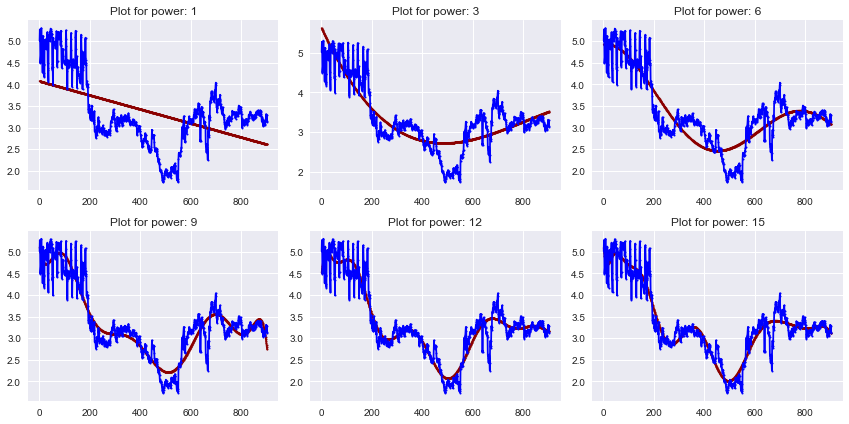

In [211]:
#Initialize a dataframe to store the results:

plt.figure(figsize=(12,6))

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = \
    linear_regression(dataX, power=i, models_to_plot=models_to_plot)

In [205]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,4.5e+02,4.1,-0.0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.8e+02,5.3,-0.01,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.7e+02,5.6,-0.014,0.0021,-8.7e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.3e+02,5,0.0014,-0.0054,0.00012,-6.8e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.2e+02,4.9,0.0063,-0.009,0.00022,-1.9e-06,5.4e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.2e+02,4.9,0.0021,-0.0047,3.8e-05,1.7e-06,-2.9e-08,1.2e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.1e+02,4.5,0.044,-0.061,0.0033,-9.4e-05,1.4e-06,-1.1e-08,3.6e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.1e+02,4.4,0.054,-0.077,0.0045,-0.00014,2.5e-06,-2.5e-08,1.2e-10,-2.4e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,79,5,-0.072,0.18,-0.02,0.0011,-3.5e-05,6.4e-07,-6.9e-09,4e-11,-9.7e-14,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,77,5.1,-0.11,0.27,-0.03,0.0017,-5.8e-05,1.2e-06,-1.5e-08,1.1e-10,-4.7e-13,8.1e-16,NaN,NaN,NaN,NaN,NaN


In [209]:
# Ridge Regression

from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],y_reg)
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(dataX['x'],y_pred, color='darkred', marker='.', ms=4)
        plt.plot(dataX['x'],y_reg, color='blue', marker='.', ms=4)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y_reg)**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

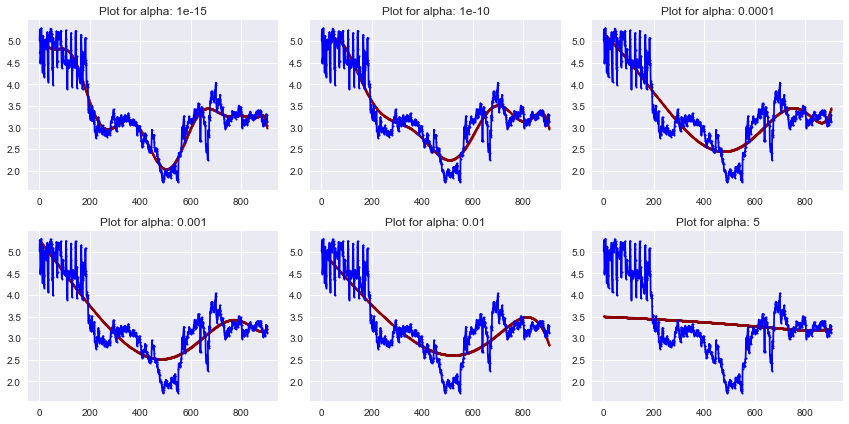

In [212]:
#Initialize predictors to be set of 15 powers of x

plt.figure(figsize=(12,6))

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(dataX, predictors, alpha_ridge[i], models_to_plot)

In [220]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,4e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.8e-20,1.5e-21,3.1e-23,3.2e-25,1.3e-27,-3.2e-29
alpha_1e-10,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,4e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.8e-20,1.5e-21,3.1e-23,3.2e-25,1.3e-27,-3.2e-29
alpha_1e-08,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,6.5e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.6e-20,1.4e-21,3.1e-23,3.2e-25,1.3e-27,-3.1e-29
alpha_1e-05,1.2e+02,5.2,-0.006,-0.0006,0,2.9e-07,0,0,-0,-2.3e-16,-4.3e-17,-0,-0,-0,0,0,3.5e-29
alpha_0.0001,1.4e+02,5.3,-0.0084,0,1.2e-05,0,0,-0,-0,-0,-7.9e-18,-1.6e-21,-0,-0,-0,0,0
alpha_0.001,2.1e+02,4.7,-0.0045,0,0,5.5e-08,0,0,0,-0,-0,-0,-0,-0,-0,-0,-4.5e-30
alpha_0.01,5.3e+02,3.6,-0.00047,-0,-0,-0,0,0,0,0,0,0,0,0,0,0,0
alpha_1,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [217]:
# LASSO Regression

from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],y_reg)
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(dataX['x'],y_pred, color='darkred', marker='.', ms=4)
        plt.plot(dataX['x'],y_reg, color='blue', marker='.', ms=4)
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y_reg)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

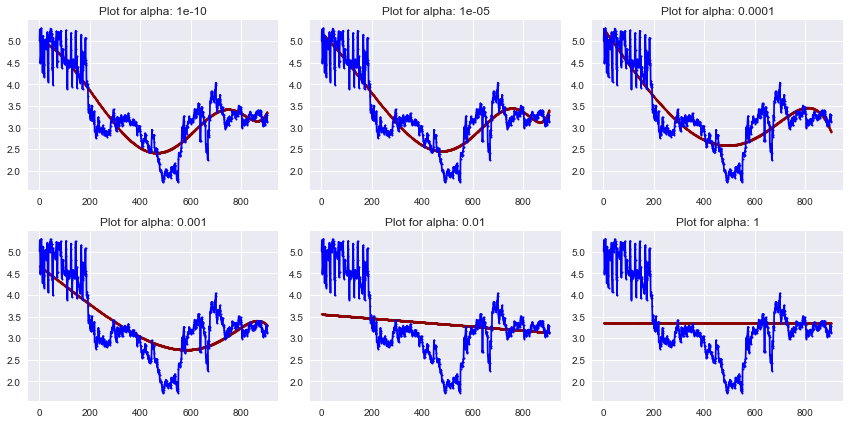

In [218]:
#Initialize predictors to all 15 powers of x

plt.figure(figsize=(12,6))

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(dataX, predictors, alpha_lasso[i], models_to_plot)

In [219]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,4e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.8e-20,1.5e-21,3.1e-23,3.2e-25,1.3e-27,-3.2e-29
alpha_1e-10,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,4e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.8e-20,1.5e-21,3.1e-23,3.2e-25,1.3e-27,-3.2e-29
alpha_1e-08,1.2e+02,5,-0.0016,-0.0026,3.1e-05,1.3e-07,1.5e-09,6.5e-13,-2.1e-13,-3.2e-15,-2.6e-17,-7.6e-20,1.4e-21,3.1e-23,3.2e-25,1.3e-27,-3.1e-29
alpha_1e-05,1.2e+02,5.2,-0.006,-0.0006,0,2.9e-07,0,0,-0,-2.3e-16,-4.3e-17,-0,-0,-0,0,0,3.5e-29
alpha_0.0001,1.4e+02,5.3,-0.0084,0,1.2e-05,0,0,-0,-0,-0,-7.9e-18,-1.6e-21,-0,-0,-0,0,0
alpha_0.001,2.1e+02,4.7,-0.0045,0,0,5.5e-08,0,0,0,-0,-0,-0,-0,-0,-0,-0,-4.5e-30
alpha_0.01,5.3e+02,3.6,-0.00047,-0,-0,-0,0,0,0,0,0,0,0,0,0,0,0
alpha_1,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,6.1e+02,3.3,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


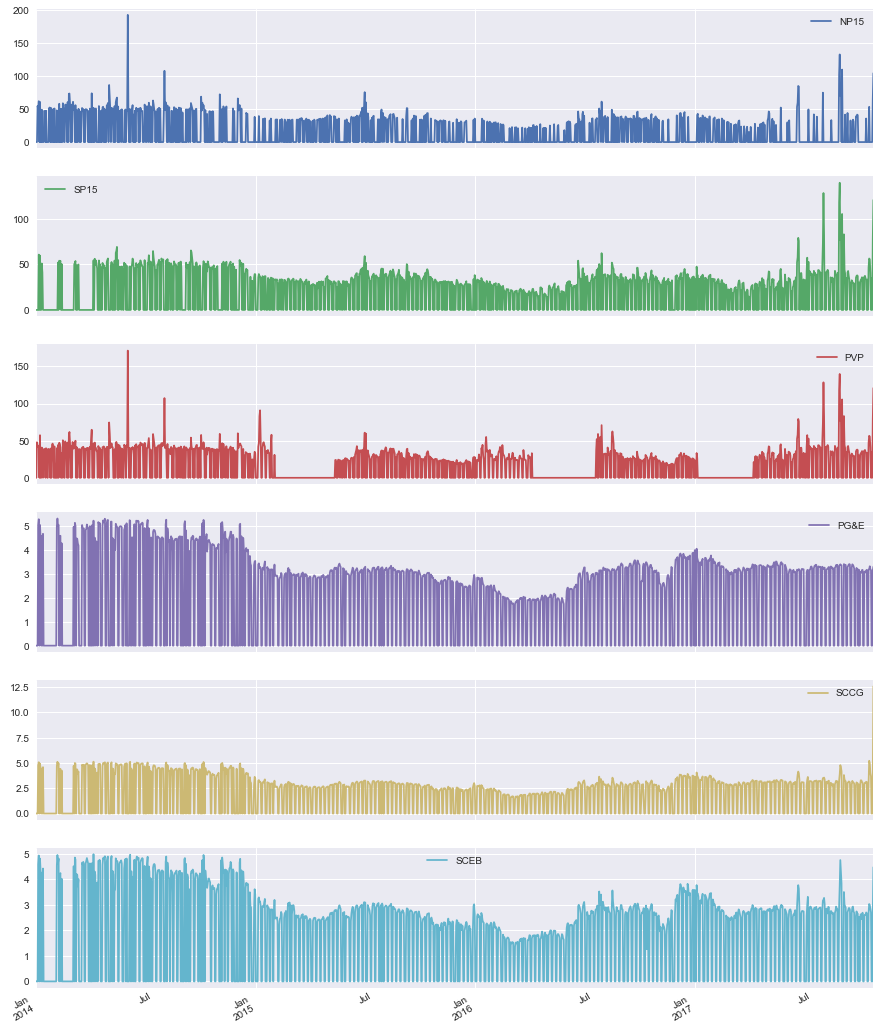

In [17]:
data.plot(subplots=True, figsize=(15, 20));

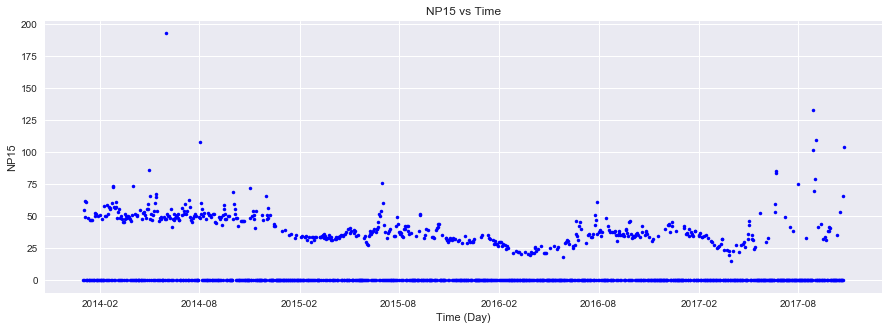

In [222]:
plt.figure(figsize=(15,5))

#plt.subplot(131)
#plt.plot(dataX['PG&E'], dataX['NP15'], c = 'blue')
plt.plot(data.index, data['NP15'], c = 'blue', linewidth = 0.1, linestyle= 'none', marker = '.')
plt.xlabel("Time (Day)")
plt.ylabel('NP15')
plt.title('NP15 vs Time')

In [221]:
#from matplotlib import cm

#plt.figure(figsize=(10,10))
#data.plot(colormap=cm.cubehelix)

In [149]:
#plt.figure(figsize=(15,10))
#data.NP15.plot(logy=True)

In [140]:
#plt.figure(figsize=(10,10))
#data.plot()

In [20]:
#plt.figure(figsize=(15,10)); 
#data.NP15.plot(style='.', label='Series');

In [150]:
#plt.figure(figsize=(15,10))
#data.plot(kind='area');